In [3]:
from DataFramesTrial import *

Welcome to JupyROOT 6.18/04


In [4]:
dflist = ReadRootFile('DataSS','MagUp')

In [5]:
df = dflist[0]

In [6]:
df = L0TriggerData(df)
df = HLT1TriggerData(df)
df = HLT2TriggerData(df,'DataSS')
df = TriggerData(df)

In [7]:
df.head()

,Lb_L0Global_TIS,Lb_L0HadronDecision_TOS,Lc_Hlt1TrackMVADecision_TOS,Lc_Hlt1TwoTrackMVADecision_TOS,Lb_Hlt2XcMuXForTauB2XcMuDecision_TOS,Lb_Hlt2XcMuXForTauB2XcFakeMuDecision_TOS,Lc_M,p_ProbNNp,p_ProbNNk,nTracks,...,pi_P,Lc_P,K_P,Lb_P,mu_P,p_P,L0,HLT1,HLT2,Trigger
0,True,False,False,True,True,False,2293.895486,0.139599,0.240121,112,...,19832.070381,63376.898224,26764.798578,67702.026469,4335.584919,16796.439736,True,True,True,True
1,False,False,True,True,True,False,2241.863511,0.630536,0.040897,156,...,29393.639612,76052.784974,18758.073999,92676.678899,16626.409572,27906.415589,False,True,True,False
2,False,False,True,True,True,False,2272.953145,0.056319,0.993643,187,...,28277.958305,99653.053972,14625.301745,105201.473430,5557.858050,56768.032007,False,True,True,False
3,True,False,True,True,True,False,2249.818104,0.021579,0.999310,83,...,21134.789338,66726.295222,27999.425749,71466.368641,4765.835315,17596.357455,True,True,True,True
4,False,False,True,True,True,False,2320.249556,0.495502,0.988775,94,...,17521.597832,50154.869357,16607.438628,80035.893448,29891.676354,16046.423871,False,True,True,False


In [8]:
def LcMassCut(df):
    df['LcMass'] = df.apply(lambda x: True if 2230<= x['Lc_M'] <=2330 else False, axis=1)
    return df
df = LcMassCut(df)
df[['Lc_M','LcMass']]

,Lc_M,LcMass
0,2293.895486,True
1,2241.863511,True
2,2272.953145,True
3,2249.818104,True
4,2320.249556,True
...,...,...
99995,2334.507550,False
99996,2305.857866,True
99997,2317.983606,True
99998,2228.037814,False


In [9]:
def ApplyPIDCalibCuts(df):
    CheckNtrks = lambda x: True if x>0 and x<700 else False
    CheckPAndPT = lambda x,y: True if (x>0 and x<200000 and y>0 and y<60000) else False
    CheckAll = lambda x, y, z, v, t: True if x & y & z & v & t else False
    particles = ['mu','p','pi','K']
    df['PIDCalib'] = df.apply(lambda x:True if (CheckNtrks(x['nTracks'])& CheckPAndPT(x['mu_P'],x['mu_PT']) & 
                              CheckPAndPT(x['pi_P'],x['pi_PT']) & CheckPAndPT(x['p_P'],x['p_PT']) &
                              CheckPAndPT(x['K_P'],x['K_PT']) )else False, axis=1)
    return df
    
df = ApplyPIDCalibCuts(df)

In [10]:
df[['nTracks','mu_P','mu_PT','p_P','p_PT','pi_P','pi_PT','K_P','K_PT','PIDCalib']]

,nTracks,mu_P,mu_PT,p_P,p_PT,pi_P,pi_PT,K_P,K_PT,PIDCalib
0,112,4335.584919,256.006782,16796.439736,1019.511394,19832.070381,562.910089,26764.798578,1429.812725,True
1,156,16626.409572,1589.982454,27906.415589,2932.210303,29393.639612,3088.302401,18758.073999,2658.427163,True
2,187,5557.858050,212.609367,56768.032007,3809.601174,28277.958305,2608.939798,14625.301745,941.591069,True
3,83,4765.835315,143.646735,17596.357455,1869.728605,21134.789338,2542.677707,27999.425749,3730.697953,True
4,94,29891.676354,1811.754651,16046.423871,720.280482,17521.597832,1189.867744,16607.438628,1650.991900,True
...,...,...,...,...,...,...,...,...,...,...
99995,49,44262.394134,1481.907613,76172.960336,1480.574860,22631.782461,914.956275,89053.491914,2880.926010,True
99996,326,7945.049665,1933.148399,12557.631542,2852.518875,17602.506595,3053.153113,19898.958738,4049.543721,True
99997,72,7578.124200,720.240379,20654.477278,2589.330004,6158.081118,1094.753056,8239.315594,493.217236,True
99998,173,6365.593383,738.670972,59173.744367,3191.423685,34859.481245,2083.861916,23288.798517,1409.269775,True


In [11]:
def ApplyMuCuts(df,dtype):
    if dtype=='Data'or dtype=='DataSS':
        df['MuCuts'] = df.apply(lambda x: True if (x['mu_PIDmu']>2 and x['mu_PIDmu']-x['mu_PIDK']>2 and
                                                  x['mu_PIDmu']-x['mu_PIDp']>2) else False, axis=1)
    else:
        df['MuCuts'] = True
    return df

df= ApplyMuCuts(df,'DataSS')
df.head()

,Lb_L0Global_TIS,Lb_L0HadronDecision_TOS,Lc_Hlt1TrackMVADecision_TOS,Lc_Hlt1TwoTrackMVADecision_TOS,Lb_Hlt2XcMuXForTauB2XcMuDecision_TOS,Lb_Hlt2XcMuXForTauB2XcFakeMuDecision_TOS,Lc_M,p_ProbNNp,p_ProbNNk,nTracks,...,Lb_P,mu_P,p_P,L0,HLT1,HLT2,Trigger,LcMass,PIDCalib,MuCuts
0,True,False,False,True,True,False,2293.895486,0.139599,0.240121,112,...,67702.026469,4335.584919,16796.439736,True,True,True,True,True,True,False
1,False,False,True,True,True,False,2241.863511,0.630536,0.040897,156,...,92676.678899,16626.409572,27906.415589,False,True,True,False,True,True,True
2,False,False,True,True,True,False,2272.953145,0.056319,0.993643,187,...,105201.473430,5557.858050,56768.032007,False,True,True,False,True,True,True
3,True,False,True,True,True,False,2249.818104,0.021579,0.999310,83,...,71466.368641,4765.835315,17596.357455,True,True,True,True,True,True,True
4,False,False,True,True,True,False,2320.249556,0.495502,0.988775,94,...,80035.893448,29891.676354,16046.423871,False,True,True,False,True,True,True


In [12]:
def GetFinalPreselection(df):
    df['Preselection'] = df.apply(lambda x: True if x['Trigger']& x['LcMass'] &x['PIDCalib'] & 
                                  x['MuCuts'] else False,axis=1)
    return df

df=GetFinalPreselection(df)
df.head()

,Lb_L0Global_TIS,Lb_L0HadronDecision_TOS,Lc_Hlt1TrackMVADecision_TOS,Lc_Hlt1TwoTrackMVADecision_TOS,Lb_Hlt2XcMuXForTauB2XcMuDecision_TOS,Lb_Hlt2XcMuXForTauB2XcFakeMuDecision_TOS,Lc_M,p_ProbNNp,p_ProbNNk,nTracks,...,mu_P,p_P,L0,HLT1,HLT2,Trigger,LcMass,PIDCalib,MuCuts,Preselection
0,True,False,False,True,True,False,2293.895486,0.139599,0.240121,112,...,4335.584919,16796.439736,True,True,True,True,True,True,False,False
1,False,False,True,True,True,False,2241.863511,0.630536,0.040897,156,...,16626.409572,27906.415589,False,True,True,False,True,True,True,False
2,False,False,True,True,True,False,2272.953145,0.056319,0.993643,187,...,5557.858050,56768.032007,False,True,True,False,True,True,True,False
3,True,False,True,True,True,False,2249.818104,0.021579,0.999310,83,...,4765.835315,17596.357455,True,True,True,True,True,True,True,True
4,False,False,True,True,True,False,2320.249556,0.495502,0.988775,94,...,29891.676354,16046.423871,False,True,True,False,True,True,True,False


In [13]:
import sys, os
sys.path.append('../PIDGen_PIDCalib_MVA/')
from Add_MVA import AddBDTinfo

def LoadBDTdf(dtype,polarity):
    ifname = filedir+'Data/Lb_'+dtype+'_'+polarity+'.root'
    bdtfname = ifname[0:-5]+'_MVA.root'
    if os.path.isfile(bdtfname):
        print('BDT file already created')
    else:
        print()
        print('>>>   Creating file with BDT variable')
        print()
        AddBDTinfo(ifname, 'tupleout/DecayTree', bdtfname, 'Data',
                   pickled_model_path = '../PIDGen_PIDCalib_MVA/xgb_reg.pkl')
    df_bdt = read_root(bdtfname,'DecayTree')
    return df_bdt

df_bdt = LoadBDTdf('DataSS','MagUp')

BDT file already created


In [14]:
df_bdt.head()

,eventNumber,runNumber,bdt
0,1789601833,178612,0.001160
1,1447333452,178612,0.273441
2,1395648138,178612,0.011024
3,1771452480,178612,0.008728
4,1703683398,178612,0.223288


In [15]:
mergedDf = df.merge(df_bdt['bdt'],left_index=True, right_index=True)
mergedDf.head()

,Lb_L0Global_TIS,Lb_L0HadronDecision_TOS,Lc_Hlt1TrackMVADecision_TOS,Lc_Hlt1TwoTrackMVADecision_TOS,Lb_Hlt2XcMuXForTauB2XcMuDecision_TOS,Lb_Hlt2XcMuXForTauB2XcFakeMuDecision_TOS,Lc_M,p_ProbNNp,p_ProbNNk,nTracks,...,p_P,L0,HLT1,HLT2,Trigger,LcMass,PIDCalib,MuCuts,Preselection,bdt
0,True,False,False,True,True,False,2293.895486,0.139599,0.240121,112,...,16796.439736,True,True,True,True,True,True,False,False,0.001160
1,False,False,True,True,True,False,2241.863511,0.630536,0.040897,156,...,27906.415589,False,True,True,False,True,True,True,False,0.273441
2,False,False,True,True,True,False,2272.953145,0.056319,0.993643,187,...,56768.032007,False,True,True,False,True,True,True,False,0.011024
3,True,False,True,True,True,False,2249.818104,0.021579,0.999310,83,...,17596.357455,True,True,True,True,True,True,True,True,0.008728
4,False,False,True,True,True,False,2320.249556,0.495502,0.988775,94,...,16046.423871,False,True,True,False,True,True,True,False,0.223288


In [16]:
BDTcut=0.7
def PassBDT(df,BDTcut):
    df['PassBDT'] = df.apply(lambda x: True if x['bdt']>BDTcut else False, axis=1)
    return df

mergedDf=PassBDT(mergedDf,BDTcut)
mergedDf.head()

,Lb_L0Global_TIS,Lb_L0HadronDecision_TOS,Lc_Hlt1TrackMVADecision_TOS,Lc_Hlt1TwoTrackMVADecision_TOS,Lb_Hlt2XcMuXForTauB2XcMuDecision_TOS,Lb_Hlt2XcMuXForTauB2XcFakeMuDecision_TOS,Lc_M,p_ProbNNp,p_ProbNNk,nTracks,...,L0,HLT1,HLT2,Trigger,LcMass,PIDCalib,MuCuts,Preselection,bdt,PassBDT
0,True,False,False,True,True,False,2293.895486,0.139599,0.240121,112,...,True,True,True,True,True,True,False,False,0.001160,False
1,False,False,True,True,True,False,2241.863511,0.630536,0.040897,156,...,False,True,True,False,True,True,True,False,0.273441,False
2,False,False,True,True,True,False,2272.953145,0.056319,0.993643,187,...,False,True,True,False,True,True,True,False,0.011024,False
3,True,False,True,True,True,False,2249.818104,0.021579,0.999310,83,...,True,True,True,True,True,True,True,True,0.008728,False
4,False,False,True,True,True,False,2320.249556,0.495502,0.988775,94,...,False,True,True,False,True,True,True,False,0.223288,False


In [17]:
def RemoveDDstar(df):
    df['NoDDstar'] = df.apply(lambda x: True if x['p_ProbNNp']- x['p_ProbNNk']>0 else False,axis=1)
    return df
mergedDf= RemoveDDstar(mergedDf)
mergedDf.head()

,Lb_L0Global_TIS,Lb_L0HadronDecision_TOS,Lc_Hlt1TrackMVADecision_TOS,Lc_Hlt1TwoTrackMVADecision_TOS,Lb_Hlt2XcMuXForTauB2XcMuDecision_TOS,Lb_Hlt2XcMuXForTauB2XcFakeMuDecision_TOS,Lc_M,p_ProbNNp,p_ProbNNk,nTracks,...,HLT1,HLT2,Trigger,LcMass,PIDCalib,MuCuts,Preselection,bdt,PassBDT,NoDDstar
0,True,False,False,True,True,False,2293.895486,0.139599,0.240121,112,...,True,True,True,True,True,False,False,0.001160,False,False
1,False,False,True,True,True,False,2241.863511,0.630536,0.040897,156,...,True,True,False,True,True,True,False,0.273441,False,True
2,False,False,True,True,True,False,2272.953145,0.056319,0.993643,187,...,True,True,False,True,True,True,False,0.011024,False,False
3,True,False,True,True,True,False,2249.818104,0.021579,0.999310,83,...,True,True,True,True,True,True,True,0.008728,False,False
4,False,False,True,True,True,False,2320.249556,0.495502,0.988775,94,...,True,True,False,True,True,True,False,0.223288,False,False


In [18]:
def FinalSelection(df):
    df['FinalSel']= df.apply(lambda x: True if x['Preselection']&x['PassBDT']&x['NoDDstar'] else False, axis=1)
    return df

mergedDf = FinalSelection(mergedDf)
mergedDf.head()

,Lb_L0Global_TIS,Lb_L0HadronDecision_TOS,Lc_Hlt1TrackMVADecision_TOS,Lc_Hlt1TwoTrackMVADecision_TOS,Lb_Hlt2XcMuXForTauB2XcMuDecision_TOS,Lb_Hlt2XcMuXForTauB2XcFakeMuDecision_TOS,Lc_M,p_ProbNNp,p_ProbNNk,nTracks,...,HLT2,Trigger,LcMass,PIDCalib,MuCuts,Preselection,bdt,PassBDT,NoDDstar,FinalSel
0,True,False,False,True,True,False,2293.895486,0.139599,0.240121,112,...,True,True,True,True,False,False,0.001160,False,False,False
1,False,False,True,True,True,False,2241.863511,0.630536,0.040897,156,...,True,False,True,True,True,False,0.273441,False,True,False
2,False,False,True,True,True,False,2272.953145,0.056319,0.993643,187,...,True,False,True,True,True,False,0.011024,False,False,False
3,True,False,True,True,True,False,2249.818104,0.021579,0.999310,83,...,True,True,True,True,True,True,0.008728,False,False,False
4,False,False,True,True,True,False,2320.249556,0.495502,0.988775,94,...,True,False,True,True,True,False,0.223288,False,False,False


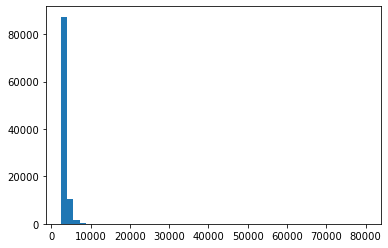

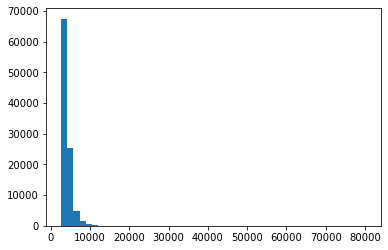

In [81]:
import matplotlib.pyplot as plt

ISOBDTcut =0.35
ISOBDT2cut=0.2

#Masses pi, K, p, mu, Lc
m_pi = 139.57018 #+/- 0.00035 MeV (PDG)
m_K = 493.677 #+/- 0.016 MeV (PDG)
m_p = 938.272081 #+/- 0.000006 MeV (PDG)
m_mu = 105.6583745 #+/- 0.0000024 MeV (PDG)
m_Lc = 2286.46 #+/- 0.14 MeV (PDG)
mLc12=[]
mTOT = []


for i in range (len(df)):
    m1=m_pi
    m2=m_pi
    PIDp = df.loc[i,'Lb_ISOLATION_PIDp']
    PIDK = df.loc[i,'Lb_ISOLATION_PIDK']
    Ch = df.loc[i,'Lb_ISOLATION_CHARGE']
    PIDp2 = df.loc[i,'Lb_ISOLATION_PIDp2']
    PIDK2 =df.loc[i,'Lb_ISOLATION_PIDK2']
    Ch2 = df.loc[i,'Lb_ISOLATION_CHARGE2']
    muCh = -df.loc[i,'mu_ID']/13

    #p1= np.matrix(df.at[i,'Lb_ISOLATION_PX'],df.at[i,'Lb_ISOLATION_PY'],df.at[i,'Lb_ISOLATION_PZ'])
    #p2= np.matrix(df.at[i,'Lb_ISOLATION_PX2'],df.at[i,'Lb_ISOLATION_PY2'],df.at[i,'Lb_ISOLATION_PZ2'])
    p1=np.array(df.loc[i,['Lb_ISOLATION_PX','Lb_ISOLATION_PY','Lb_ISOLATION_PZ']])
    E1pi =np.sqrt(p1.dot(p1.T)+m_pi*m_pi)
    p2=np.array(df.loc[i,['Lb_ISOLATION_PX2','Lb_ISOLATION_PY2','Lb_ISOLATION_PZ2']])
    E2pi =np.sqrt(p2.dot(p2.T)+m_pi*m_pi)
    #print(E1pi,E2pi)
    pLc=np.array(df.loc[i,['Lc_PX','Lc_PY','Lc_PZ']])
    ELc = np.sqrt(pLc.dot(pLc.T)+m_Lc*m_Lc)
    ELc12 = E1pi+E2pi+ELc
    pLc12 = p1+p2+pLc
    mLc12.append(np.sqrt(ELc12*ELc12 - pLc12.dot(pLc12.T)))
    if PIDp>4.:
        if (Ch==-muCh or (Ch==muCh and (PIDp-PIDK)<0.)):
            m1 = m_K
            isK1=1
        if (Ch==muCh and PIDp-PIDK>0.):#I assume it is a pion
            m1 = m_pi
    if PIDK2>4.:
        if (Ch2==-muCh or (Ch2==muCh and (PIDp2 - PIDK2)<0.)):
            #I also assume this particle is a K
            m2 = m_K
            isK2=1
        if (Ch2==muCh and PIDp2-PIDK2>0.):
            m2 = m_pi
    #-> I compute the energy of the 2 particles:
    E1 = np.sqrt(p1.dot(p1.transpose()) + m1*m1)
    E2 = np.sqrt(p2.dot(p2.transpose()) + m2*m2)
    #-> I retrieve the momentum of the muon
    pmu = np.array(df.loc[i,['mu_PX','mu_PY','mu_PZ']])
    Emu = np.sqrt(pmu.dot(pmu.transpose()) + m_mu*m_mu)
    #-> I compute the total momentum and energy of the 4 particles:
    pTOT = p1 + p2 + pmu + pLc
    ETOT = E1 + E2 + Emu + ELc
    #-> I evaluate the invariant mass
    mTOT.append(np.sqrt(ETOT*ETOT - pTOT.dot(pTOT.T)))
    
    if mLc12[i]>2770 and mTOT[i]<5620 and (isK1==1 or isK2==1):
        df.at[i,'isKenriched'] = True
    else:
        df.at[i,'isKenriched'] = False
#else:
#    df[i]['isKenriched'] = False
    
plt.hist(mLc12, bins = 50)
plt.show()

plt.hist(mTOT,bins=50)
plt.show()

In [117]:
mask = (mergedDf.Lb_ISOLATION_BDT > ISOBDTcut) & (mergedDf.Lb_ISOLATION_BDT2 > ISOBDT2cut)
#mergedDf[~mask].head()--> per negazione
#df1= mergedDf[mask].copy()
df1 = mergedDf.copy()
df1['E1pi'] = np.sqrt(df1["Lb_ISOLATION_PX"]**2 + df1['Lb_ISOLATION_PY']**2 + df1['Lb_ISOLATION_PZ']**2 + m_pi**2)
df1['E2pi'] = np.sqrt(df1["Lb_ISOLATION_PX2"]**2 + df1['Lb_ISOLATION_PY2']**2 + df1['Lb_ISOLATION_PZ2']**2 + m_pi**2)
df1['ELc'] =np.sqrt(df1['Lc_PX']**2+df1['Lc_PY']**2+df1['Lc_PZ']**2 + m_Lc**2)
df1['pLc12_x'] = df1['Lc_PX']+df1["Lb_ISOLATION_PX"]+df1["Lb_ISOLATION_PX2"]
df1['pLc12_y'] = df1['Lc_PY']+df1["Lb_ISOLATION_PY"]+df1["Lb_ISOLATION_PY2"]
df1['pLc12_z'] = df1['Lc_PZ']+df1["Lb_ISOLATION_PZ"]+df1["Lb_ISOLATION_PZ2"]
df1['mLc12'] = np.sqrt((df1['ELc']+df1['E1pi']+df1['E2pi'])**2 - 
                       (df1['pLc12_x']**2+df1['pLc12_y']**2+df1['pLc12_z']**2))
df1=df1.drop(columns = ['pLc12_x','pLc12_y','pLc12_z'])
df1['muCharge'] = -df1['mu_ID']/13
df1['m1'] = m_pi
df1['m2'] = m_pi
df1['PIDdiff'] =df1['Lb_ISOLATION_PIDp'] - df1['Lb_ISOLATION_PIDK']
df1['PIDdiff2'] =df1['Lb_ISOLATION_PIDp2'] - df1['Lb_ISOLATION_PIDK2']
df1[((df1.Lb_ISOLATION_CHARGE==-df1.muCharge) | (df1.Lb_ISOLATION_CHARGE==df1.muCharge & df1.PIDdiff<0.))].head()
#df1.head()

TypeError: unsupported operand type(s) for &: 'float' and 'float'

In [73]:
ISOBDTcut =0.35
ISOBDT2cut=0.2

#Masses pi, K, p, mu, Lc
m_pi = 139.57018 #+/- 0.00035 MeV (PDG)
m_K = 493.677 #+/- 0.016 MeV (PDG)
m_p = 938.272081 #+/- 0.000006 MeV (PDG)
m_mu = 105.6583745 #+/- 0.0000024 MeV (PDG)
m_Lc = 2286.46 #+/- 0.14 MeV (PDG)

def CheckIfIsKenriched(df):
    mLc12=[]
    mTOT=[]
    for i in range (len(df)):
        #print(i)
        BDT = df.loc[i,'Lb_ISOLATION_BDT']
        BDT2 = df.loc[i,'Lb_ISOLATION_BDT2']
        PIDp = df.loc[i,'Lb_ISOLATION_PIDp']
        PIDK = df.loc[i,'Lb_ISOLATION_PIDK']
        Ch = df.loc[i,'Lb_ISOLATION_CHARGE']
        PIDp2 = df.loc[i,'Lb_ISOLATION_PIDp2']
        PIDK2 =df.loc[i,'Lb_ISOLATION_PIDK2']
        Ch2 = df.loc[i,'Lb_ISOLATION_CHARGE2']
        muCh = -df.loc[i,'mu_ID']/13
        isK1, isK2=0,0

        if BDT>ISOBDTcut and BDT2>ISOBDT2cut:
            m1 = m_pi
            m2 = m_pi
            #I retrieve the momenta of the 2 anti-isolated particles
            #------------------------
            #I will do in the following several mass hypothesis for these 2 particles to make
            #the Kenriched sample as cleaner as possible
            #------------------------
            #I want to discard events coming from LcStar ->Lcpipi
            #-> I assume that the 2 anti-isolated particles are 2 pions
            p1=np.array(df.loc[i,['Lb_ISOLATION_PX','Lb_ISOLATION_PY','Lb_ISOLATION_PZ']])
            E1pi =np.sqrt(p1.dot(p1.transpose())+m_pi*m_pi)
            p2=np.array(df.loc[i,['Lb_ISOLATION_PX2','Lb_ISOLATION_PY2','Lb_ISOLATION_PZ2']])
            E2pi =np.sqrt(p2.dot(p2.transpose())+m_pi*m_pi)
            #print(E1pi,E2pi)
            pLc=np.array(df.loc[i,['Lc_PX','Lc_PY','Lc_PZ']])
            ELc = np.sqrt(pLc.dot(pLc.transpose())+m_Lc*m_Lc)
            ELc12 = E1pi+E2pi+ELc
            pLc12 = p1+p2+pLc
            mLc12.append(np.sqrt(ELc12*ELc12 - pLc12.dot(pLc12.transpose())))
            if PIDp>4.:
                if (Ch==-muCh or (Ch==muCh and (PIDp-PIDK)<0.)):
                    m1 = m_K
                    isK1=1
                if (Ch==muCh and PIDp-PIDK>0.):#I assume it is a pion
                    m1 = m_pi
            if PIDK2>4.:
                if (Ch2==-muCh or (Ch2==muCh and (PIDp2 - PIDK2)<0.)):
                    #I also assume this particle is a K
                    m2 = m_K
                    isK2=1
                if (Ch2==muCh and PIDp2-PIDK2>0.):
                    m2 = m_pi
            #-> I compute the energy of the 2 particles:
            E1 = np.sqrt(p1.dot(p1.transpose()) + m1*m1)
            E2 = np.sqrt(p2.dot(p2.transpose()) + m2*m2)
            #-> I retrieve the momentum of the muon
            pmu = np.array(df.loc[i,['mu_PX','mu_PY','mu_PZ']])
            Emu = np.sqrt(pmu.dot(pmu.transpose()) + m_mu*m_mu)
            #-> I compute the total momentum and energy of the 4 particles:
            pTOT = p1 + p2 + pmu + pLc
            ETOT = E1 + E2 + Emu + ELc
            #-> I evaluate the invariant mass
            mTOT.append(np.sqrt(ETOT*ETOT - pTOT.dot(pTOT.transpose())))

            if mLc12[i]>2770 and mTOT[i]<5620 and (isK1==1 or isK2==1):
                df.at[i,'isKenriched'] = True
                #print(mLc12[i])
            else:
                df.at[i,'isKenriched'] = False
        else:
            mLc12.append(-99)
            mTOT.append(99999)
            df.at[i,'isKenriched'] = False
    return df

mergedDf = CheckIfIsKenriched(mergedDf)
mergedDf.head()

,Lb_L0Global_TIS,Lb_L0HadronDecision_TOS,Lc_Hlt1TrackMVADecision_TOS,Lc_Hlt1TwoTrackMVADecision_TOS,Lb_Hlt2XcMuXForTauB2XcMuDecision_TOS,Lb_Hlt2XcMuXForTauB2XcFakeMuDecision_TOS,Lc_M,p_ProbNNp,p_ProbNNk,nTracks,...,Trigger,LcMass,PIDCalib,MuCuts,Preselection,bdt,PassBDT,NoDDstar,FinalSel,isKenriched
0,True,False,False,True,True,False,2293.895486,0.139599,0.240121,112,...,True,True,True,False,False,0.001160,False,False,False,True
1,False,False,True,True,True,False,2241.863511,0.630536,0.040897,156,...,False,True,True,True,False,0.273441,False,True,False,False
2,False,False,True,True,True,False,2272.953145,0.056319,0.993643,187,...,False,True,True,True,False,0.011024,False,False,False,False
3,True,False,True,True,True,False,2249.818104,0.021579,0.999310,83,...,True,True,True,True,True,0.008728,False,False,False,False
4,False,False,True,True,True,False,2320.249556,0.495502,0.988775,94,...,False,True,True,True,False,0.223288,False,False,False,False


In [74]:
def CheckIfIsIsolated(df):
    df['isIsolated'] = df.apply(lambda x: True if x['Lb_ISOLATION_BDT']<ISOBDTcut 
                                else False, axis=1)
    return df

mergedDf = CheckIfIsIsolated(mergedDf)
mergedDf.head()

,Lb_L0Global_TIS,Lb_L0HadronDecision_TOS,Lc_Hlt1TrackMVADecision_TOS,Lc_Hlt1TwoTrackMVADecision_TOS,Lb_Hlt2XcMuXForTauB2XcMuDecision_TOS,Lb_Hlt2XcMuXForTauB2XcFakeMuDecision_TOS,Lc_M,p_ProbNNp,p_ProbNNk,nTracks,...,LcMass,PIDCalib,MuCuts,Preselection,bdt,PassBDT,NoDDstar,FinalSel,isKenriched,isIsolated
0,True,False,False,True,True,False,2293.895486,0.139599,0.240121,112,...,True,True,False,False,0.001160,False,False,False,True,False
1,False,False,True,True,True,False,2241.863511,0.630536,0.040897,156,...,True,True,True,False,0.273441,False,True,False,False,True
2,False,False,True,True,True,False,2272.953145,0.056319,0.993643,187,...,True,True,True,False,0.011024,False,False,False,False,False
3,True,False,True,True,True,False,2249.818104,0.021579,0.999310,83,...,True,True,True,True,0.008728,False,False,False,False,False
4,False,False,True,True,True,False,2320.249556,0.495502,0.988775,94,...,True,True,True,False,0.223288,False,False,False,False,False


In [75]:
df_bdt

,eventNumber,runNumber,bdt
0,1789601833,178612,0.001160
1,1447333452,178612,0.273441
2,1395648138,178612,0.011024
3,1771452480,178612,0.008728
4,1703683398,178612,0.223288
...,...,...,...
11653104,679733287,179319,0.057179
11653105,679733287,179319,0.057179
11653106,2057019297,179319,0.001090
11653107,1357520275,179319,0.003937


In [79]:
a=[1,3,4,5]
for n,i in enumerate(a):
    print(n)

0
1
2
3


In [80]:
mergedDf.to_root('Lb_DataSS_Df_preselection.root','DecayTree')

/disk/lhcb_data2/buonaura/miniconda3/envs/lhcb_ana/lib/python3.7/site-packages/root_numpy/_tree.py:575: UserWarning: converter for dtype('O') is not implemented (skipping)
  cobj = _librootnumpy.array2tree_toCObj(arr, name=name, tree=incobj)
